### Import Python Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

### Set Campaign Parameters (From R/F Tool)

In [49]:
campaign_spend = 34_400_313  # User-defined spend level 
campaign_reach = 0.906  # Known reach at this spend level (50%)
campaign_frequency = 10.7  # Known frequency at this spend level
campaign_impressions = 1_227_705_678 # Known impressions at this spend level
audience_size = 127_051_439  # Total audience size
max_reach = 0.982  # Maximum possible reach (e.g., 90% of audience)
CPM = 28.02  # Cost per 1000 impressions (should back into spend and impressions)

### Calculate Estimates for PDR Curve

In [50]:
# Estimates the effieciency factor for reach growth
k_estimated = -np.log(1 - (campaign_reach / max_reach)) / campaign_spend

# Generates 100 evenly spaced spend levels between 1 and 35,000,000
spend_levels = np.linspace(1, 50_000_000, 100) 

# Calculates estimated reach using the efficiency factor
estimated_reach = max_reach * (1 - np.exp(-k_estimated * spend_levels))
estimated_reach = np.minimum(estimated_reach, max_reach)

# Calculate estimated frequency
estimated_impressions = (spend_levels / CPM) * 1000
estimated_trps = (estimated_impressions / audience_size) * 100
estimated_frequency = np.divide(estimated_impressions, 
                                (audience_size * estimated_reach), 
                                out=np.zeros_like(estimated_impressions), 
                                where=estimated_reach != 0)

### Calculate PDR Point 

In [51]:
# Calculate PDR values
reach_deltas = np.diff(estimated_reach)
pdr_threshold = 0.1* np.max(reach_deltas) # incremental reach gain is less than 5% of the highest gain
pdr_index_diff = np.argmax(reach_deltas < pdr_threshold)
pdr_index = pdr_index_diff + 1  
pdr_spend = spend_levels[pdr_index]
pdr_reach = estimated_reach[pdr_index]

# Create a dataframe to store the results
pdr_df = pd.DataFrame({
    "Spend ($)": spend_levels,
    "Est. Reach": estimated_reach * 100,
    "Est. Frequency": estimated_frequency
})

### Map PDR Curve

PDR Spend: 31,818,182.18
PDR Reach: 88.99
Campaign Spend: 34,400,313.00


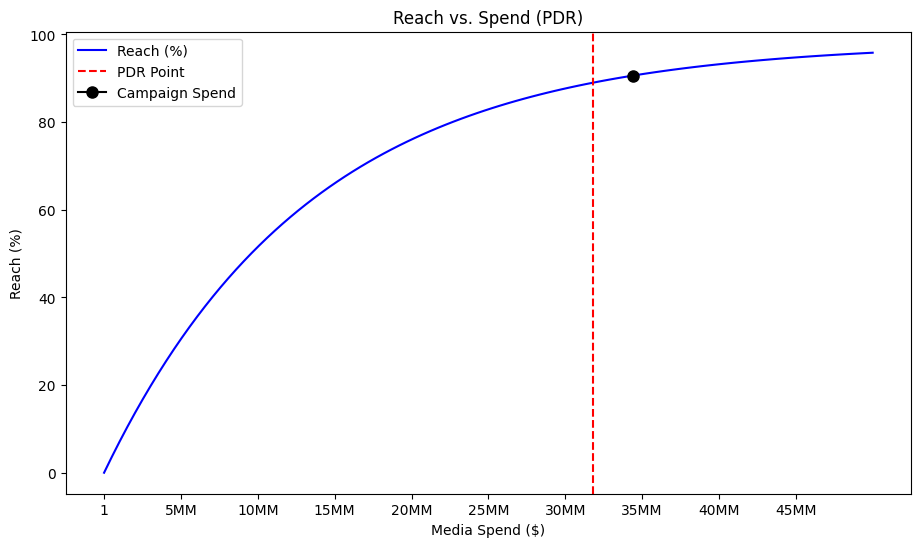

In [60]:
# Step 9: Plot PDR Curve
plt.figure(figsize=(24, 6))

# Reach vs. Spend
plt.subplot(1, 2, 1)
plt.plot(spend_levels, estimated_reach * 100, label="Reach (%)", color="blue")
plt.axvline(x=pdr_spend, linestyle="--", color="red", label="PDR Point")
plt.plot(campaign_spend, campaign_reach * 100, marker="o", markersize=8, color="black", label="Campaign Spend")
plt.xlabel("Media Spend ($)")
plt.ylabel("Reach (%)")
plt.title("Reach vs. Spend (PDR)")
plt.xticks([1,5e6,10e6,15e6,20e6,25e6,30e6,35e6,40e6, 45e6], ["1", "5MM", "10MM","15MM","20MM","25MM","30MM","35MM","40MM","45MM"])
plt.legend()

print(f"PDR Spend: {pdr_spend:,.2f}")
print(f"PDR Reach: {pdr_reach * 100:.2f}")
print(f"Campaign Spend: {campaign_spend:,.2f}")
